### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import pickle


### Downloading csv files

In [2]:
!wget --header="Host: doc-0g-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311_nonce=2c0hqefg23pgi" --header="Connection: keep-alive" "https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/qsjidfpnmj4diojc7cc9ek2g7tdcv8d7/1645937700000/08255761277798433337/08255761277798433337/18dK6EVVTOQmncVkR0TlydW8d9QZu5sOa?e=download&ax=ACxEAsZ0mDa1Kxbt_BnnIXEPrN9U3UVhQ7VNLzMRNviC34EXgDq_Zt2Yv19xTfOWYaAsU4MG5hmCRwb77fgVEbzKv8oLwcyBqGoaqlKGRjj2tgUmgw-cKnWmF74IK8azzeZk7I1hHOMvy_HUdpP00CGqayZFPekAw1aeH4iev8qRzjCuElnwDuQirD_nOksMOckOXVeErutphQzsgTHaMYLYrljP7PAlIW83XFGYhJE8IMU1e13ryeIMudi_5ojc8z5plTfdaArxehhYIbUWFFHr4Dwj2zDYmU-fMHJeivAFz1u6TZUHRVACFR_2BkxzIYVhaIYnaUgFBEFaTHudEOXEwlQ5eh-asBl231FgkrZgvdDIP8zmTtyCpI-ny43JP7552prniekYvrnuww5HyZis_kN2UjVCPhX-szSsZRiFVWFlHrdddAPrVLyzvukQ2P9UzrT3Ygj7UjKF8zUmiDwrUz7gw-LXQFZKq_D4AYgFmoxZgcRr_MOar1nkjkZuk1qxkiVKZJaFxfLgVf6CRlMQFNOx-ZBBOnWtq0dVdQTyAKdfGJ7qPxPjghwfpLjDM82U_XD2bJlR6blvO6QzUqV7GrvL4lunJbaSh11dMaZbLh7zu1JEksKa6uynhLew2u422LoiLMwiGSgzWrn2SjD7sQ-jc_oQax1FGHwM0AU&authuser=0&nonce=2c0hqefg23pgi&user=08255761277798433337&hash=1jm480unu8d6kqfkindl7ds9s5lmgdq1" -c -O 'anime_recommendation.zip'

--2022-02-27 04:56:31--  https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/qsjidfpnmj4diojc7cc9ek2g7tdcv8d7/1645937700000/08255761277798433337/08255761277798433337/18dK6EVVTOQmncVkR0TlydW8d9QZu5sOa?e=download&ax=ACxEAsZ0mDa1Kxbt_BnnIXEPrN9U3UVhQ7VNLzMRNviC34EXgDq_Zt2Yv19xTfOWYaAsU4MG5hmCRwb77fgVEbzKv8oLwcyBqGoaqlKGRjj2tgUmgw-cKnWmF74IK8azzeZk7I1hHOMvy_HUdpP00CGqayZFPekAw1aeH4iev8qRzjCuElnwDuQirD_nOksMOckOXVeErutphQzsgTHaMYLYrljP7PAlIW83XFGYhJE8IMU1e13ryeIMudi_5ojc8z5plTfdaArxehhYIbUWFFHr4Dwj2zDYmU-fMHJeivAFz1u6TZUHRVACFR_2BkxzIYVhaIYnaUgFBEFaTHudEOXEwlQ5eh-asBl231FgkrZgvdDIP8zmTtyCpI-ny43JP7552prniekYvrnuww5HyZis_kN2UjVCPhX-szSsZRiFVWFlHrdddAPrVLyzvukQ2P9UzrT3Ygj7UjKF8zUmiDwrUz7gw-LXQFZKq_D4AYgFmoxZgcRr_MOar1nkjkZuk1qxkiVKZJaFxfLgVf6CRlMQFNOx-ZBBOnWtq0dVdQTyAKdfGJ7qPxPjghwfpLjDM82U_XD2bJlR6blvO6QzUqV7GrvL4lunJbaSh11dMaZbLh7zu1JEksKa6uynhLew2u422LoiLMwiGSgzWrn2SjD7sQ-jc_oQax1FGHwM0AU&authuser=0&nonce=2c0hqefg23pgi&user=08255761277798433337&hash=

In [3]:
!unzip anime_recommendation.zip

Archive:  anime_recommendation.zip
  inflating: anime.csv               
  inflating: __MACOSX/._anime.csv    
  inflating: rating.csv              
  inflating: __MACOSX/._rating.csv   


### Reading csv files

#### Reading anime csv file

In [4]:
anime_data = pd.read_csv('anime.csv')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Reading rating csv file

In [5]:
rating_data = pd.read_csv('rating.csv')
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
print(anime_data.shape)
print(rating_data.shape)

(12294, 7)
(7813737, 3)


In [7]:
rating_data['rating'].describe()

count    7.813737e+06
mean     6.144030e+00
std      3.727800e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

### EDA

#### Plotting rating histogram

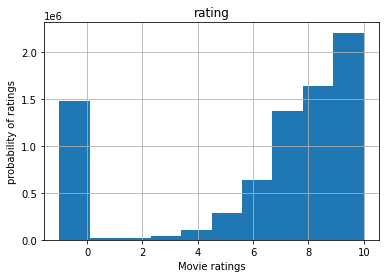

In [8]:
rating_data.hist(column='rating');
plt.xlabel("Movie ratings")
plt.ylabel("probability of ratings")
plt.show()

In [9]:
rating_data['rating'].value_counts()


 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

1. Almost 14lakh ratings haven't been done
2. The rating 1 occurs the least number of times
3. The rating 8 occurs the most number of times

In [18]:
len(rating_data.user_id.unique())

73515

In [19]:
len(rating_data.anime_id.unique())

11200

In [24]:
grouped_by_user = rating_data.groupby("user_id")
print(grouped_by_user.count())
print("On average a user has rated these many movies: ", grouped_by_user.count().anime_id.mean())

         anime_id  rating
user_id                  
1             153     153
2               3       3
3              94      94
4              52      52
5             467     467
...           ...     ...
73512          13      13
73513          33      33
73514           1       1
73515         196     196
73516           2       2

[73515 rows x 2 columns]
On average a user has rated these many movies:  106.28765558049378


In [26]:
grouped_by_movie = rating_data.groupby("anime_id")
print(grouped_by_movie.count())
print('On average a movie has been rated by these many users: ', grouped_by_movie.count().user_id.mean())

          user_id  rating
anime_id                 
1           15509   15509
5            6927    6927
6           11077   11077
7            2629    2629
8             413     413
...           ...     ...
34367           5       5
34412           1       1
34475           4       4
34476           1       1
34519           1       1

[11200 rows x 2 columns]
On average a movie has been rated by these many users:  697.6550892857143


### Pre-processing

#### Removing rows that don't have rating

In [8]:
no_rating_data = rating_data[rating_data['rating'] == -1] 
print(no_rating_data.head())
print(no_rating_data.shape)

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1
(1476496, 3)


#### Creating Adjacency Matrix

In [10]:
from scipy.sparse import csr_matrix
import numpy as np

rows = rating_data['user_id'].values
columns = rating_data['anime_id'].values
values = rating_data['rating'].values


adjacency_matrix = csr_matrix((values, (rows, columns)), shape=(np.amax(rows)+1, np.amax(columns)+1))

In [11]:
adjacency_matrix.shape

(73517, 34476)

#### Matrix Factorization

In [12]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
# matrix = adjacency_matrix.toarray() # converting to dense matrix
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components = 5, n_iter = 5, random_state = None)
print(U.shape)
print(Sigma.shape)
V = VT.T
print(V.shape)

(73517, 5)
(5,)
(34476, 5)


### Collaborative Filtering

#### Compute mean of ratings

In [13]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.

    return ratings.mean()

In [14]:
mu = m_u(rating_data['rating'])
print(mu)

7.808496946857473


#### Computing Biases

In [25]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros
    arr = []
    for i in range(0, dim):
        arr.append(0)

    return arr

In [34]:
dim = np.amax(rows) + 1# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [35]:
dim = np.amax(columns) + 1 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

##### Compute dL/db_i

In [28]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    return 2*(mu + 2*b_i[user_id] + c_j[item_id] + U[user_id].dot(V.T[item_id].T) - rating)


##### Compute dL/dc_j

In [29]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    return 2*(mu + b_i[user_id] + 2*c_j[item_id] + U[user_id].dot(V.T[item_id].T) - rating)


#### SGD + Computing MSE

In [43]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

np_data = rating_data.to_numpy()
epochs = 20
learning_rate = 0.001
mses_1 = []
for epoch in range(0, epochs):
    y_pred = []
    for row in tqdm(np_data):
        user = row[0]
        movie = row[1]
        rating = row[2]
        b_i[user] = b_i[user] - learning_rate * derivative_db(user, movie, rating, U, VT, mu, learning_rate)  
        c_j[movie] = c_j[movie] - learning_rate * derivative_dc(user, movie, rating, U, VT, mu,learning_rate)
            
        y_pred.append(mu + b_i[user] + c_j[movie] + U[user].dot(V[movie].T))
                
    mse = mean_squared_error(rating_data['rating'].values, y_pred)
    if(epoch == 0):
      mses_1.append(mse)
      continue
    last_mse = mses_1[-1]
    if(mse >= last_mse):
      print("Error increased..")
      print(mse, last_mse)
      break
    elif((last_mse - mse) < 0.000001):
      print("Error did not decrease by much..: ", (mse - last_mse))
      print(mse, last_mse)
      break 
    print(mses_1)
    mses_1.append(mse)
            




100%|██████████| 6337241/6337241 [00:59<00:00, 106288.02it/s]


[1.673245029034275]


100%|██████████| 6337241/6337241 [00:59<00:00, 106506.09it/s]


[1.673245029034275, 1.6731643225000694]


100%|██████████| 6337241/6337241 [00:59<00:00, 105981.86it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238]


100%|██████████| 6337241/6337241 [00:59<00:00, 106244.75it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723]


100%|██████████| 6337241/6337241 [00:59<00:00, 105676.27it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166]


100%|██████████| 6337241/6337241 [01:00<00:00, 105465.94it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256]


100%|██████████| 6337241/6337241 [00:59<00:00, 106090.66it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006]


100%|██████████| 6337241/6337241 [01:00<00:00, 105076.69it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169]


100%|██████████| 6337241/6337241 [01:00<00:00, 105280.98it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878]


100%|██████████| 6337241/6337241 [00:59<00:00, 105660.46it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962]


100%|██████████| 6337241/6337241 [01:00<00:00, 105156.97it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835]


100%|██████████| 6337241/6337241 [00:59<00:00, 106633.46it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167]


100%|██████████| 6337241/6337241 [00:59<00:00, 106337.63it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847]


100%|██████████| 6337241/6337241 [00:59<00:00, 106629.23it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318]


100%|██████████| 6337241/6337241 [00:59<00:00, 106399.57it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434]


100%|██████████| 6337241/6337241 [00:59<00:00, 106374.09it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434, 1.6722644058663234]


100%|██████████| 6337241/6337241 [00:59<00:00, 106796.41it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434, 1.6722644058663234, 1.6722129421867853]


100%|██████████| 6337241/6337241 [01:00<00:00, 105276.16it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434, 1.6722644058663234, 1.6722129421867853, 1.672162821886624]


100%|██████████| 6337241/6337241 [00:59<00:00, 106020.95it/s]


[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434, 1.6722644058663234, 1.6722129421867853, 1.672162821886624, 1.6721139922463466]


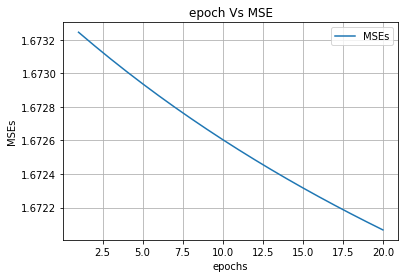

[1.673245029034275, 1.6731643225000694, 1.673086300780238, 1.6730108228863723, 1.6729377593307166, 1.6728669905518256, 1.6727984056851006, 1.672731901578169, 1.6726673819843878, 1.6726047568891962, 1.672543941937835, 1.6724848579422167, 1.6724274304507847, 1.6723715893696318, 1.6723172686258434, 1.6722644058663234, 1.6722129421867853, 1.672162821886624, 1.6721139922463466, 1.6720664033246906]


In [44]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(mses_1) + 1), mses_1, label='MSEs')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("MSEs")
plt.title("epoch Vs MSE")
plt.grid()
plt.show()
print(mses_1)

### Recommendation for Users

In [52]:
from tqdm import tqdm
# predicting ratings for all the movies for a user
def predict_rating_for_user(user_id):
  predicted_ratings_for_user = {}
  for movie_id in tqdm(anime_data['anime_id'].values):
    if(movie_id >= len(c_j)): # if a movie is not rated by any of the users, we cannot predict rating for that movie. This is called cold start problem.
      continue # this if condition ignores such movies since matrix factorization cannot solve that issue.
    predicted_rating = mu + b_i[user_id] + c_j[movie_id] + U[user_id].dot(V[movie_id].T)
    predicted_ratings_for_user[movie_id] = predicted_rating
  return predicted_ratings_for_user
                                                                          

# getting top 5 animes names based on the predicted ratings and recommending it to a user
def get_top_5_animes(user_id):
  predicted_ratings_for_user = predict_rating_for_user(user_id)
  top_5_anime_ids = sorted(predicted_ratings_for_user, key = predicted_ratings_for_user.get, reverse = True)[:5]
  # print(top_5_anime_ids)
  recommended_movie_data = anime_data[anime_data['anime_id'].isin(top_5_anime_ids)]
  # print(recommended_movie_data['name'].values)
  return recommended_movie_data['name'].values


get_top_5_animes(1)




100%|██████████| 12294/12294 [00:00<00:00, 172734.16it/s]


array(['Kimi no Na wa.', 'Gintama°', 'Gintama&#039;',
       'Ginga Eiyuu Densetsu', 'Gintama&#039;: Enchousen'], dtype=object)